# CN5 shotgun metagenomics functional analysis - Sandoval Velasquez et al., Campi Flegrei degassing

## Loading required packages and setting up plot preferences and ggplot theme for the Giovannelli Lab

In [10]:
save.image("Sandoval_et_al_funprofiler.RData")

In [1]:
load("Sandoval_et_al_funprofiler.RData")

In [2]:
library(phyloseq)
library(ggplot2)
library(vegan)
library(viridis)
library(tidyverse)
library(ggrepel)
library(corrplot)
library(microbiome)
library(tibble)
library(ggpmisc)
library(viridis)
library(cowplot)
library(rio)
library(tidyr)
library(dplyr)
library(ggpubr)
library(pairwiseAdonis)
library(purrr)

Loading required package: permute

Loading required package: viridisLite

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.6.0
✔ lubridate 1.9.4     ✔ tibble    3.3.0
✔ purrr     1.2.0     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
corrplot 0.95 loaded


microbiome R package (microbiome.github.com)
    


 Copyright (C) 2011-2022 Leo Lahti, 
    Sudarshan Shetty et al. <microbiome.github.io>



Attaching package: ‘microbiome’


The following object is masked from ‘package:vegan’:

    diversity


The following object is masked from ‘package:ggplot2’:

    alpha


The following object is masked from ‘package:base’:

    transform


Loading required p

In [3]:
# Setting up the Giovannelli Lab plot theme
theme_glab <- function(base_size = 11,
                    base_family = "",
                    base_line_size = base_size / 180,
                    base_rect_size = base_size / 180) {
   
    font <- "Helvetica" #assign font family up front
   
    theme_bw(base_size = base_size,
                base_family = base_family,
                base_line_size = base_line_size) %+replace%
    theme(
        legend.background =  element_blank(),
        legend.title =       element_text(color = rgb(100, 100, 100, maxColorValue = 255),
                                          size = rel(0.65),
                                         hjust = 0),
        legend.text =        element_text(color = rgb(100, 100, 100, maxColorValue = 255),
                                          size = rel(0.65)),
        legend.key.size =    unit(0.8, "lines"),
     
      plot.title = element_text(
        color = rgb(100, 100, 100, maxColorValue = 255),
        hjust = 0),
       
      axis.title = element_text(
        color = rgb(100, 100, 100, maxColorValue = 255),
        size = rel(0.65)),
      axis.text = element_text(
        color = rgb(100, 100, 100, maxColorValue = 255),
        size = rel(0.65)),
       
      plot.caption = element_text(
        color = rgb(100, 100, 100, maxColorValue = 255),
        size = rel(0.35),
        hjust = 1),
       
      panel.grid.major = element_blank(),  
      panel.grid.minor = element_blank(),  
      panel.border = element_rect(fill = NA, colour = rgb(100, 100, 100, maxColorValue = 255)),

     
      complete = TRUE
    )
}

In [4]:
options(repr.plot.width=16, repr.plot.height=12)
set.seed(10000)

## Generating the phyloseq objects

In [ ]:
# loading the KO table to use as tax_table
external_table <- read.csv("Biogeochemical_cycles_tax_table.csv", header=T, sep=",", row.names=1)

In [7]:
# loading the Funprofiler annotation data to use as otu table
dataset <- read.csv("CN5_otu_rpo_normalised.csv", header=T, sep=",", row.names=1)

dataset

,T1D1,T1D2,T2D1,T2D2,T3D1,T3D2,T4D1,T4D2,T4D3,T5D1,⋯,T8D2,T9D1,T9D2,T9D3,SF1D13_B1,SF1D13_B2,SF1D13_F2,SF2A_B1,SF2B_B1,SF2C_B1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
K00001,0.046948357,0.088,0.080160321,0.096525097,0.040201005,0.047008547,0.072936660,0.026455026,0.040650407,0.043835616,⋯,0.055555556,0.046783626,0.037296037,0.023419204,0.074626866,0.044665012,0.05109489,0.084444444,0.082788671,0.077087794
K00002,0.004694836,0.008,0.012024048,0.015444015,0.010050251,0.012820513,0.011516315,0.010582011,0.004065041,0.005479452,⋯,0.010101010,0.011695906,0.004662005,0.004683841,0.009950249,0.019851117,0.00000000,0.008888889,0.017429194,0.004282655
K00003,0.178403756,0.224,0.264529058,0.247104247,0.195979899,0.192307692,0.188099808,0.132275132,0.178861789,0.186301370,⋯,0.217171717,0.216374269,0.149184149,0.163934426,0.223880597,0.203473945,0.21167883,0.217777778,0.178649237,0.188436831
K00004,0.032863850,0.044,0.056112224,0.046332046,0.030150754,0.047008547,0.049904031,0.047619048,0.040650407,0.032876712,⋯,0.030303030,0.035087719,0.023310023,0.042154567,0.029850746,0.029776675,0.02919708,0.040000000,0.030501089,0.042826552
K00005,0.018779343,0.020,0.012024048,0.003861004,0.010050251,0.012820513,0.000000000,0.021164021,0.008130081,0.016438356,⋯,0.005050505,0.017543860,0.009324009,0.004683841,0.000000000,0.000000000,0.00000000,0.000000000,0.004357298,0.004282655
K00006,0.000000000,0.000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,⋯,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.00000000,0.000000000,0.004357298,0.000000000
K00007,0.000000000,0.000,0.000000000,0.000000000,0.005025126,0.000000000,0.003838772,0.005291005,0.000000000,0.000000000,⋯,0.000000000,0.005847953,0.004662005,0.000000000,0.000000000,0.000000000,0.00000000,0.008888889,0.000000000,0.008565310
K00008,0.023474178,0.044,0.064128257,0.073359073,0.025125628,0.072649573,0.057581574,0.052910053,0.036585366,0.043835616,⋯,0.030303030,0.058479532,0.046620047,0.051522248,0.089552239,0.089330025,0.07299270,0.080000000,0.104575163,0.107066381
K00009,0.023474178,0.028,0.012024048,0.023166023,0.010050251,0.029914530,0.015355086,0.026455026,0.012195122,0.016438356,⋯,0.010101010,0.023391813,0.023310023,0.004683841,0.000000000,0.000000000,0.00729927,0.000000000,0.004357298,0.004282655


In [36]:
# loading the environmental dataset
env_data <- read.csv("CN5_env_dataset.csv", header=T, sep=",", row.names=3)
env_data

,ExpID,SiteID,sample_name,site_name,dist_vent,series,continent,country,year,date,⋯,DHS,DV,HF,PV,SR,slab_0me,SDepth,SDip,ConvR,ConvAge
,<chr>,<chr>,<chr>,<chr>,<dbl>,<lgl>,<chr>,<chr>,<int>,<int>,⋯,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
SF1D13_B1,CN523,SF1D13,SF1D13_B1,Secca delle Fumose geyser,0.000000,NA,EU,ITA,2023,45086,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
SF2A_B1,CN523,SF2A,SF2A_B1,Secca delle Fumose emissioni fredde,50.000000,NA,EU,ITA,2023,45086,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
SF2B_B1,CN523,SF2B,SF2B_B1,Secca delle Fumose emissioni fredde,20.000000,NA,EU,ITA,2023,45086,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
SF2C_B1,CN523,SF2C,SF2C_B1,Secca delle Fumose emissioni fredde,20.000000,NA,EU,ITA,2023,45086,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
SF1D13_B2,CN523,SF1D13,SF1D13_B2,Secca delle Fumose geyser,0.000000,NA,EU,ITA,2023,45135,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
SF1D13_F2,CN523,SF1D13,SF1D13_F2,Secca delle Fumose geyser,0.000000,NA,EU,ITA,2023,45135,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
T1D1,CN523,T1D1,T1D1,Secca delle Fumose transect,408.590292,NA,EU,ITA,2024,45586,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
T1D2,CN523,T1D2,T1D2,Secca delle Fumose transect,408.510742,NA,EU,ITA,2024,45586,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
T2D1,CN523,T2D1,T2D1,Secca delle Fumose transect,195.909232,NA,EU,ITA,2024,45586,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [43]:
phyloseq_by_pathway$MethOx

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 10 taxa and 27 samples ]
sample_data() Sample Data:       [ 27 samples by 216 sample variables ]
tax_table()   Taxonomy Table:    [ 10 taxa by 12 taxonomic ranks ]

In [44]:
sample_data(phyloseq_by_pathway$AsOx)

,ExpID,SiteID,sample_name,site_name,dist_vent,series,continent,country,year,date,⋯,DHS,DV,HF,PV,SR,slab_0me,SDepth,SDip,ConvR,ConvAge
,<chr>,<chr>,<chr>,<chr>,<dbl>,<lgl>,<chr>,<chr>,<int>,<int>,⋯,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
T1D1,CN523,T1D1,T1D1,Secca delle Fumose transect,408.590292,NA,EU,ITA,2024,45586,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
T1D2,CN523,T1D2,T1D2,Secca delle Fumose transect,408.510742,NA,EU,ITA,2024,45586,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
T2D1,CN523,T2D1,T2D1,Secca delle Fumose transect,195.909232,NA,EU,ITA,2024,45586,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
T2D2,CN523,T2D2,T2D2,Secca delle Fumose transect,195.743269,NA,EU,ITA,2024,45586,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
T3D1,CN523,T3D1,T3D1,Secca delle Fumose transect,22.030439,NA,EU,ITA,2024,45586,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
T3D2,CN523,T3D2,T3D2,Secca delle Fumose transect,7.305252,NA,EU,ITA,2024,45586,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
T4D1,CN523,T4D1,T4D1,Secca delle Fumose transect,86.224247,NA,EU,ITA,2024,45586,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
T4D2,CN523,T4D2,T4D2,Secca delle Fumose transect,85.846495,NA,EU,ITA,2024,45586,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
T4D3,CN523,T4D3,T4D3,Secca delle Fumose transect,85.805715,NA,EU,ITA,2024,45586,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [45]:
for (p in all_pathways) {
  kos <- external_table$KO[external_table$Pathway == p]
  dups <- kos[duplicated(kos)]
  if (length(dups) > 0) {
    cat("Pathway", p, "has duplicated KOs:", unique(dups), "\n")
  }
}

Pathway Ethanol has duplicated KOs: K04072 
Pathway Methanogenesis has duplicated KOs: K03388 K03389 K03390 K08264 K08265 K14126 K14127 K14128 K22480 K22481 K22482 K00125 K22516 K00399 K00401 K00402 K00577 K00578 K00579 K00580 K00581 K00582 K00583 K00584 K14082 


### Single-element phyloseq objects

In [46]:
all_elements <- unique(external_table$Element)
all_elements

[1] "Arsenic"        "Carbon"         "Chlorite"       "Hydrogen"      
 [5] "Iron"           "Nitrogen"       "Oxygen"         "Photosynthesis"
 [9] "Selenium"       "Sulfur"

In [8]:
# build a function to subset for single-element associated KOs
make_phyloseq_element <- function(element_name, sample_metadata = NULL) {
  tax_sub <- external_table %>%
    dplyr::filter(Element == element_name)
     kos <- tax_sub$KO
      otu_sub <- dataset[rownames(dataset) %in% kos, ]

  if (nrow(otu_sub) == 0) {
    message("Skipping element '", element_name, "': no KOs found in dataset.")
    return(NULL)
  }

  tax_sub <- tax_sub[tax_sub$KO %in% rownames(otu_sub), ]
  tax_sub <- tax_sub[match(rownames(otu_sub), tax_sub$KO), ]

  rownames(tax_sub) <- tax_sub$KO
  tax_ps <- tax_table(as.matrix(tax_sub))
  otu_ps <- otu_table(as.matrix(otu_sub), taxa_are_rows = TRUE)

  if (!is.null(sample_metadata)) {
    samp_ps <- sample_data(sample_metadata)
    phyloseq(otu_ps, tax_ps, samp_ps)
  } else {
    phyloseq(otu_ps, tax_ps)
  }
}

In [48]:
# build phyloseq objects by element
phyloseq_by_element <- lapply(all_elements, function(e){
  make_phyloseq_element(e, sample_metadata = env_data)
})
names(phyloseq_by_element) <- all_elements

In [49]:
phyloseq_by_element$Carbon

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 265 taxa and 27 samples ]
sample_data() Sample Data:       [ 27 samples by 216 sample variables ]
tax_table()   Taxonomy Table:    [ 265 taxa by 12 taxonomic ranks ]

In [9]:
phyloseq_by_element$Sulfur

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 54 taxa and 27 samples ]
sample_data() Sample Data:       [ 27 samples by 216 sample variables ]
tax_table()   Taxonomy Table:    [ 54 taxa by 12 taxonomic ranks ]

### Phyloseq object of all biogeochemical KOs

In [30]:
# remove empty element objects and merge all element-specific phyloseq objects into a single one
phyloseq_by_element <- Filter(Negate(is.null), phyloseq_by_element)

ps_all <- Reduce(merge_phyloseq, phyloseq_by_element)

ps_all

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 480 taxa and 27 samples ]
sample_data() Sample Data:       [ 27 samples by 216 sample variables ]
tax_table()   Taxonomy Table:    [ 480 taxa by 12 taxonomic ranks ]

## Beta diversity based on biogeochemical KOs

In [36]:
# normalize counts across samples, then convert to relative abundance
ps_n <- transform_sample_counts(ps_all, function(x) (x / sum(x, na.rm = TRUE)) *
    median(colSums(otu_table(ps_all), na.rm = TRUE))
)

ps_ra <- transform_sample_counts(ps_n, function(x) x / sum(x, na.rm = TRUE)
)

In [37]:
# PCoA, weighted Jaccard
pcoa_j_w <- ordinate(ps_ra, method   = "PCoA", distance = "jaccard", trymax = 100
)

In [39]:
# apply custom pH transformation
stretch_ph <- function(x,
                       lo1 = c(5.90, 6.40), to1 = c(0.00, 0.25),
                       lo2 = c(8.20, 8.35), to2 = c(0.35, 1.00),
                       split = 7) {
  y <- rep(NA_real_, length(x))
  i1 <- x <= split
  i2 <- x >  split
  y[i1] <- scales::rescale(x[i1], from = lo1, to = to1)
  y[i2] <- scales::rescale(x[i2], from = lo2, to = to2)
  y
}

# add to sample_data
sample_data(ps_ra)$ph_stretch <- stretch_ph(sample_data(ps_ra)$ph)

ph_ticks <- c(6, 6.2, 6.4, 8.2, 8.3)
stretch_ticks <- stretch_ph(ph_ticks)


In [ ]:
# inspect PCoA eigenvalues and compute % variance explained by the first two axes 
pcoa_j_w$values$Relative_eig

var_expl <- round(100 * pcoa_j_w$values$Relative_eig[1:2], 2)

[1] 0.512478440 0.092584024 0.053804122 0.047190269 0.033903100 0.027994924
 [7] 0.023891156 0.018861367 0.018017321 0.017353319 0.016589050 0.014700042
[13] 0.013652723 0.012281935 0.011742009 0.011024995 0.009978748 0.009280601
[19] 0.009159613 0.008003553 0.007376648 0.007255670 0.006416570 0.006025109
[25] 0.005416315 0.005018376

Warning message:
“ggrepel: 20 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


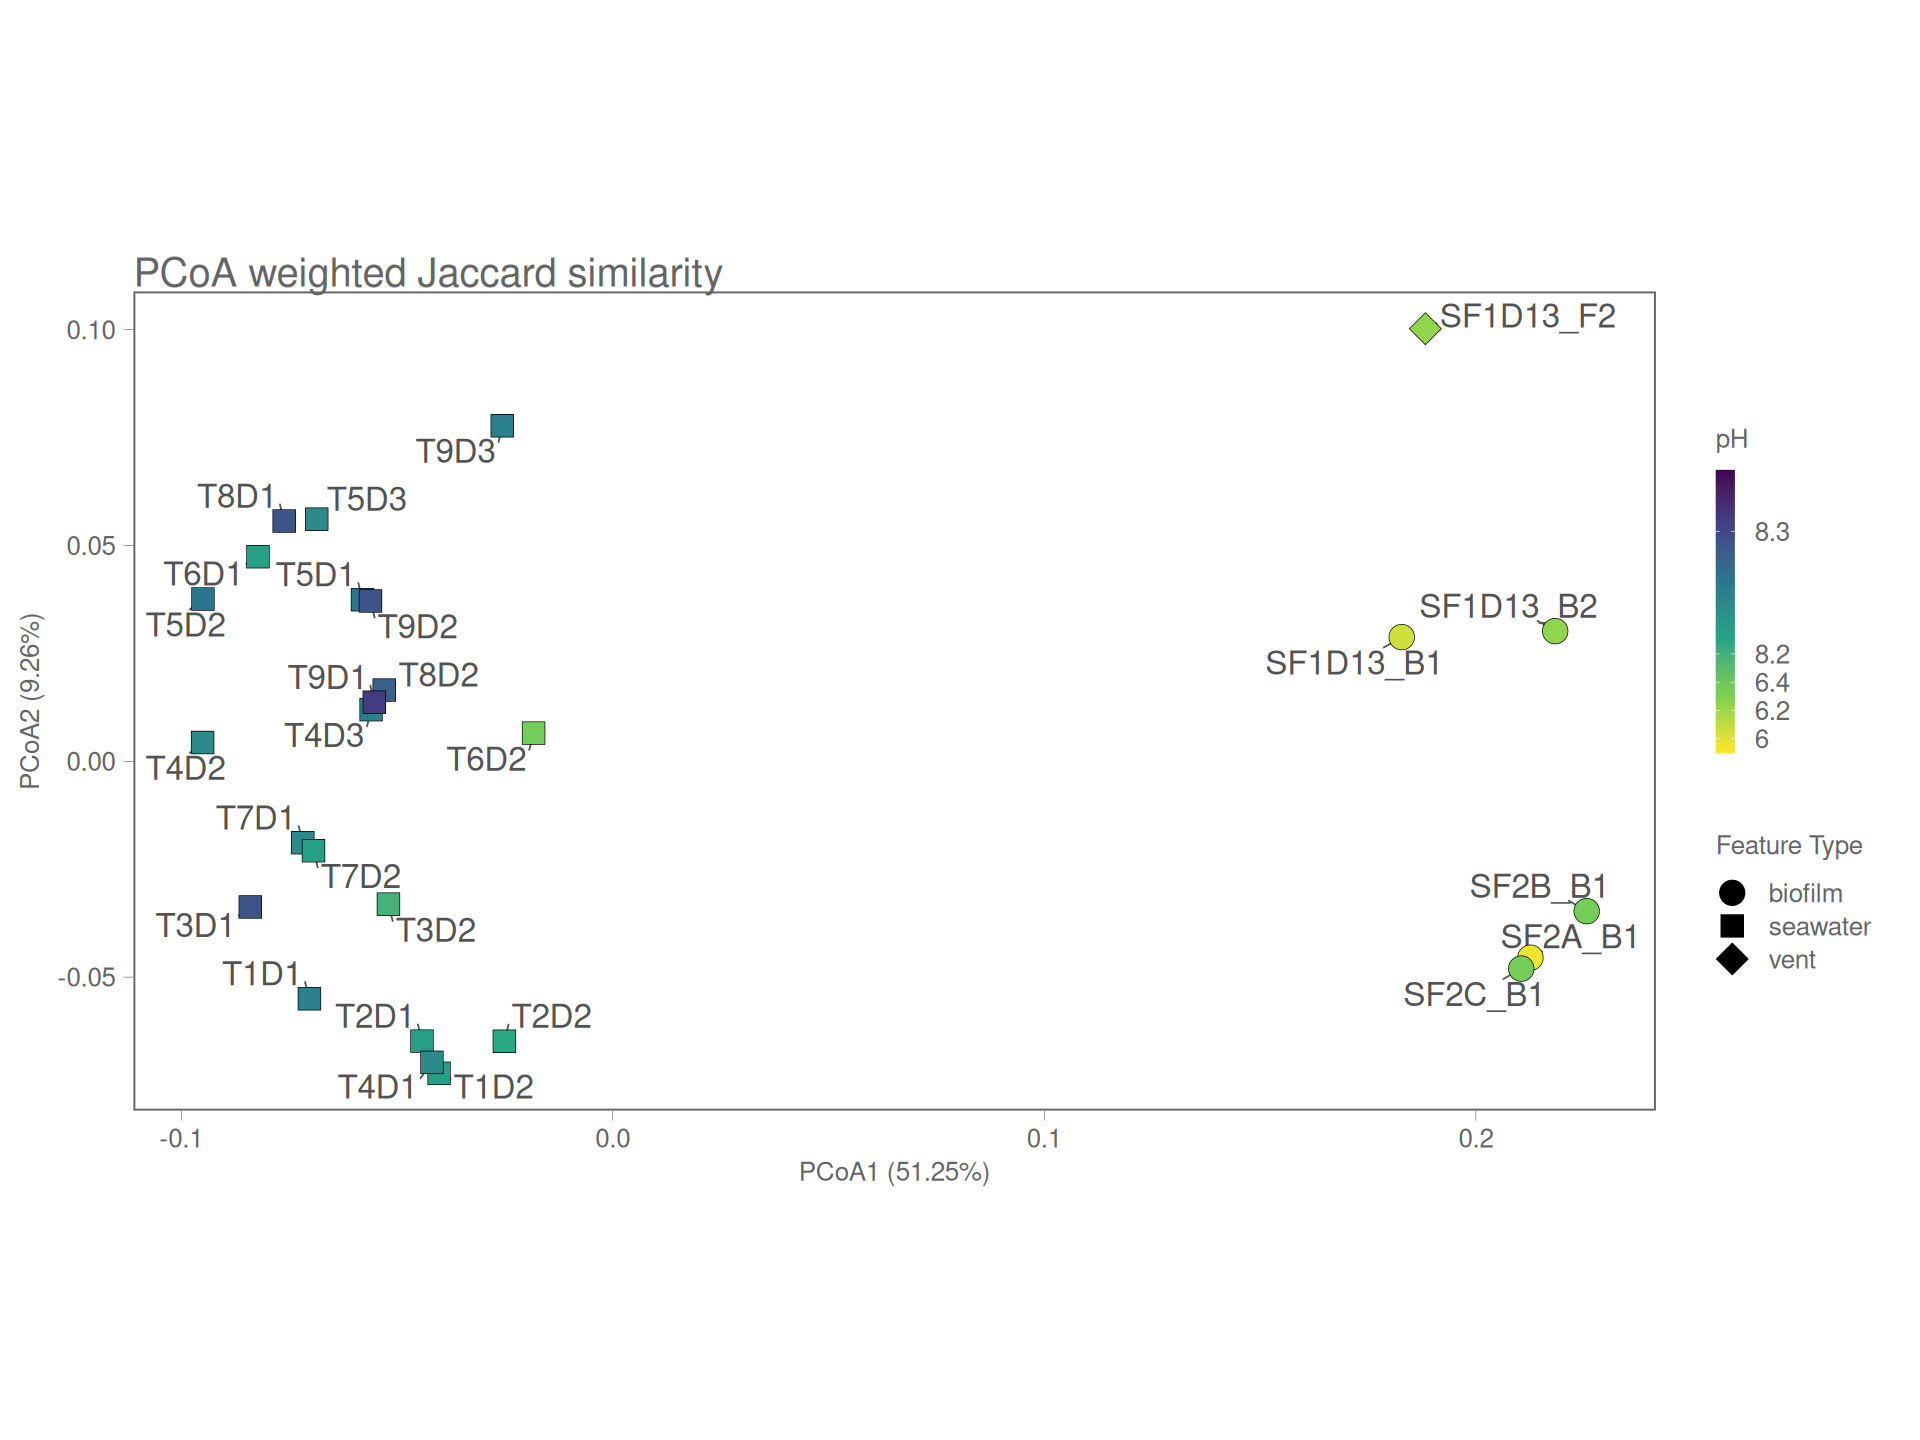

In [43]:
# plot weighted-Jaccard PCoA considering all biogeochemical KOs
p_pcoa_j_w <- plot_ordination(
  ps_ra,
  pcoa_j_w
) +
  ggrepel::geom_text_repel(
    aes(label = sample_name), size = 7, color = "gray32",
    min.segment.length = 0, seed = 42, box.padding = 0.5, force = 2
  ) +
  geom_point(
    aes(fill = ph_stretch, shape = feature_type),
    size = 7, color = "black", stroke = 0.3
  ) +
  scale_shape_manual(values = c(21, 22, 23)) +
  scale_fill_viridis_c(
  option = "viridis", direction = -1,
  limits = c(0, 1),
    breaks = stretch_ticks,
    labels = ph_ticks,
    oob = scales::squish
)+
  guides(
      fill  = guide_colorbar(barheight = unit(60, "mm")),
      shape = guide_legend(override.aes = list(fill = "black"))
  ) +
coord_fixed(ratio=1)+
labs(
  x = paste0("PCoA1 (", var_expl[1], "%)"),
  y = paste0("PCoA2 (", var_expl[2], "%)"),
  shape = "Feature Type",
  fill  = "pH",
  title = "PCoA weighted Jaccard similarity"
)+
  theme_glab(base_size = 24) +
  theme(legend.position = "right") 

p_pcoa_j_w

#ggsave("./plots/pcoa_wj_ph.png", p_pcoa_j, width = 16, height = 8, dpi = 300)
#ggsave("./plots/pcoa_wj_ph.svg", p_pcoa_j, width = 16, height = 8, dpi = 300)

## Bubble plots at the element level

### Key genes of carbon fixation only

In [5]:
# keep only key genes involved in carbon fixation
df_carbon_key <- phyloseq_by_element$Carbon %>%
  psmelt() %>%
  filter(
    cycle == "Carbon fixation",   # only C-fixation
    key_gene == "yes"             # only key genes
  )

In [6]:
# aggregate abundance per sample
df_key <- df_carbon_key %>%
  group_by(Sample, gene, Pathway, feature_type) %>%
  summarize(Abundance = sum(Abundance), .groups = "drop") %>%
    arrange(Pathway, gene) %>% # order by pathway then gene
    mutate(
    gene_path = paste0(Pathway, " | ", gene), # create combined label: "Pathway | gene"
    gene_path = factor(gene_path, levels = unique(gene_path)),
    feature_type = factor(feature_type, levels = c("biofilm", "vent", "seawater")),
  ) 

In [7]:
# drop zeros fand compute legend breaks for size scale
df_key_plot <- df_key %>% 
  dplyr::filter(Abundance > 0)

min_ab <- min(df_key_plot$Abundance)
max_ab <- max(df_key_plot$Abundance)

legend_breaks <- seq(min_ab, max_ab, length.out = 6)

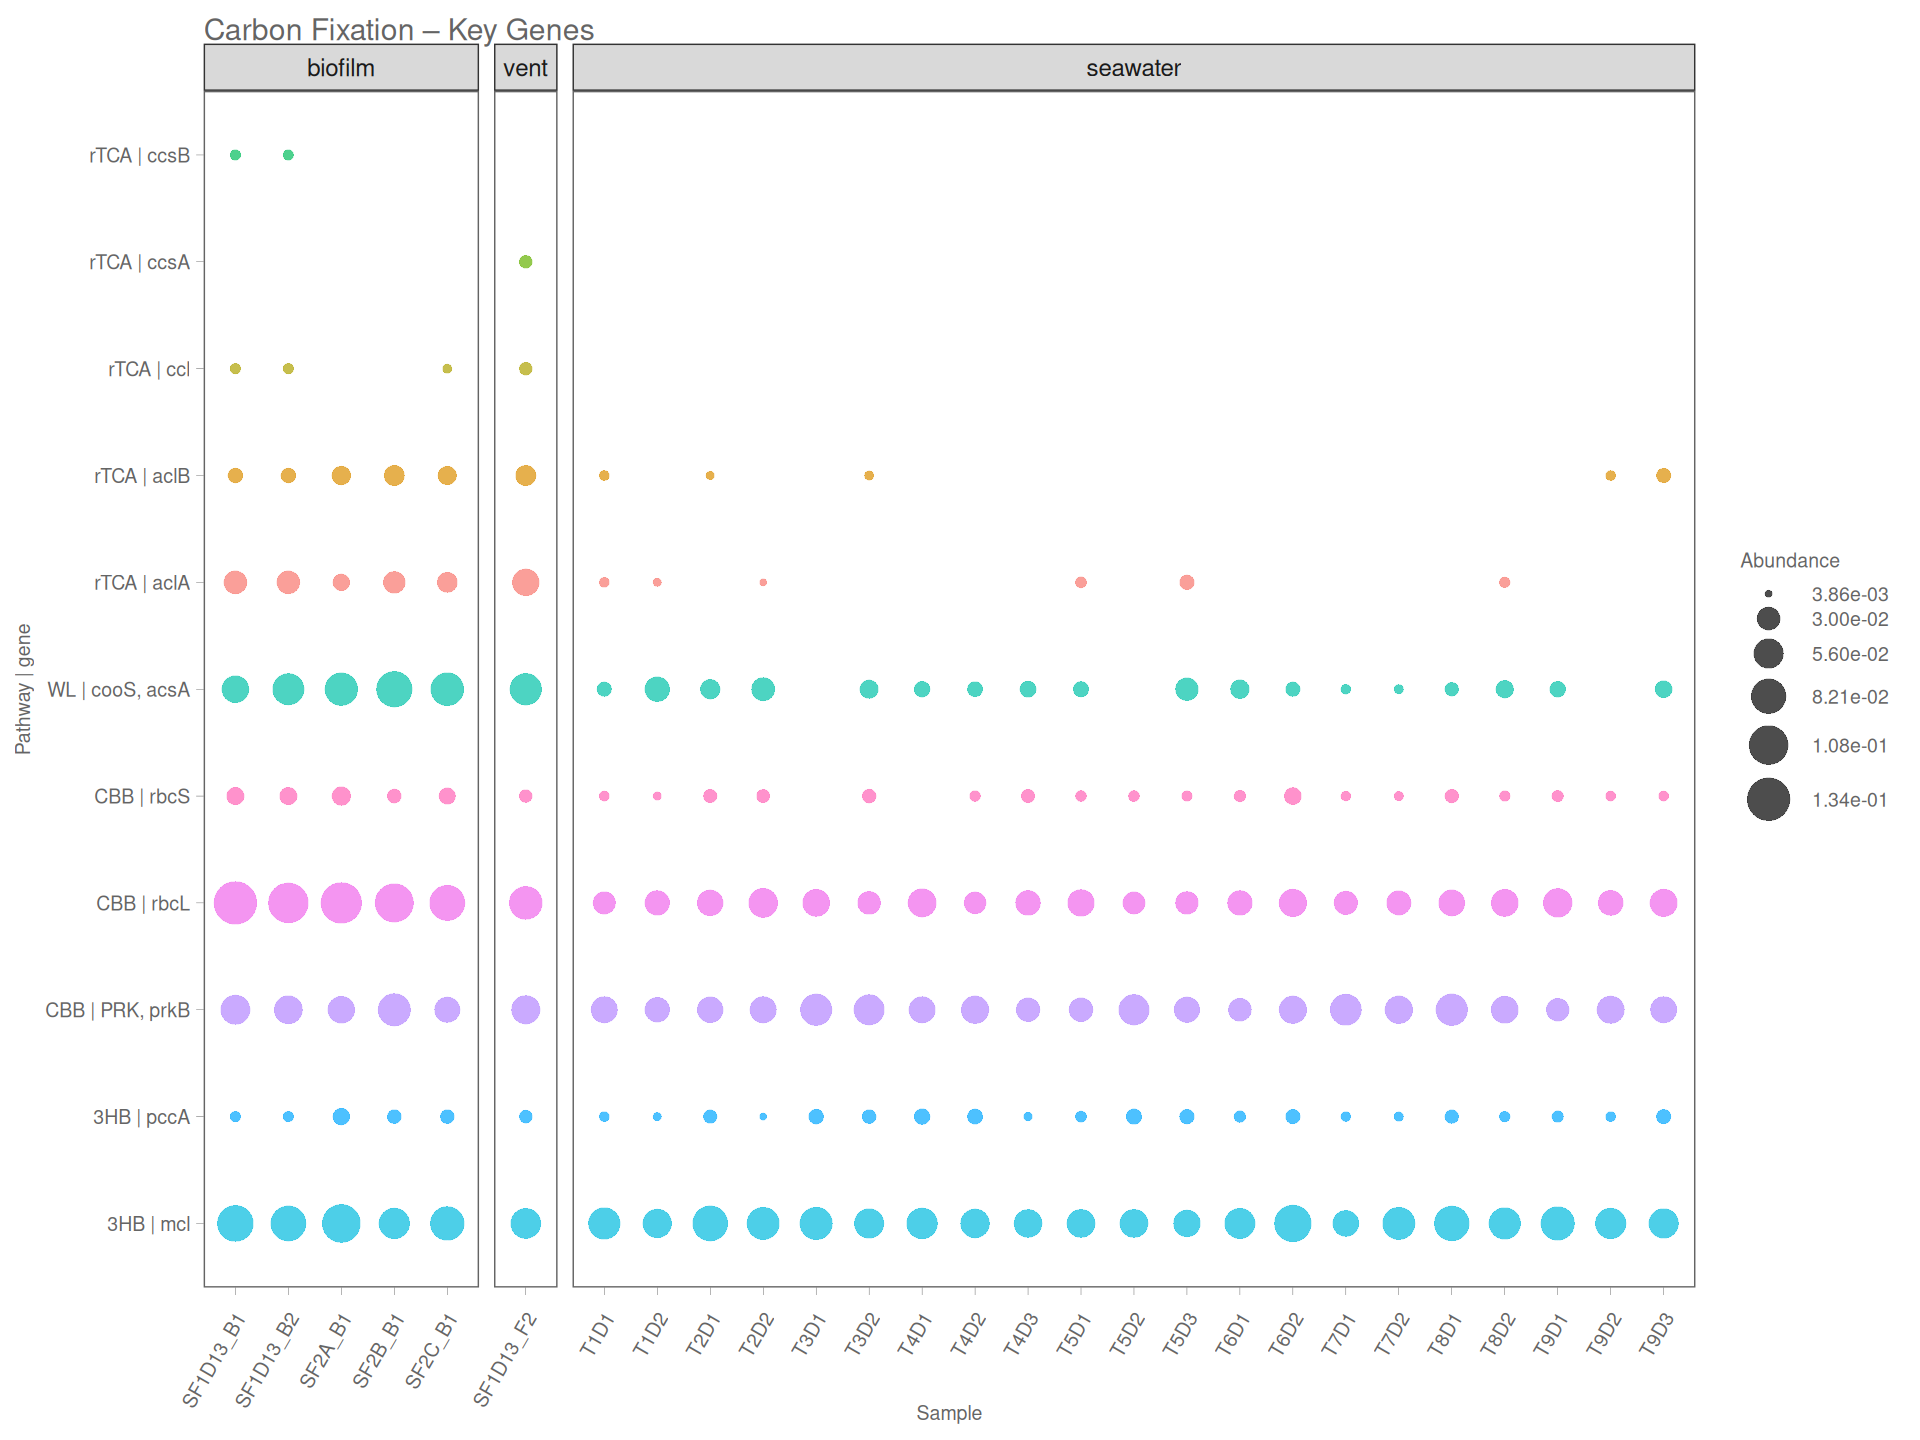

In [8]:
# bubble plot of carbon-fixation key genes
p_cfix_key <- ggplot(df_key_plot, aes(x = Sample, y = gene_path)) +
  geom_point(aes(size = Abundance, color = gene),
             alpha = 0.7) +
  scale_size_continuous(
    range  = c(2, 12),
    breaks = legend_breaks,
    labels = scales::scientific,
    name   = "Abundance"
  ) +
  facet_grid(. ~ feature_type, scales = "free_x", space = "free_x") +
  theme_bw() +
  theme_glab(base_size = 18) +
  theme(axis.text.x = element_text(angle = 60, vjust = 0.9, hjust = 1)) +
  guides(color = "none") +
  labs(
    title = "Carbon Fixation – Key Genes",
    x = "Sample",
    y = "Pathway | gene"
  )

p_cfix_key

#ggsave("./plots/CF_key_bubble.png", p_cfix_key,width = 16, height = 6, dpi = 300)
#ggsave("./plots/CF_key_bubble.svg", p_cfix_key,width = 16, height = 6, dpi = 300)

### Key genes involved in sulfur cycle 

In [9]:
# keep only key genes involved in sulfur cycling
df_sulfur_key <- phyloseq_by_element$Sulfur %>%
  psmelt() %>%
  filter(
    key_gene == "yes"             # only key genes
  )

In [56]:
# aggregate abundance per sample
df_key <- df_sulfur_key %>%
  group_by(Sample, gene, Pathway, feature_type) %>%
  summarize(Abundance = sum(Abundance), .groups = "drop") %>%
  # order by pathway then gene
  arrange(Pathway, gene) %>%
  # create combined label: "Pathway | gene"
  mutate(
    gene_path = paste0(Pathway, " | ", gene),
    gene_path = factor(gene_path, levels = unique(gene_path)),
    feature_type = factor(feature_type, levels = c("biofilm", "vent", "seawater")),
  )

In [ ]:
# drop zeros fand compute legend breaks for size scale
df_key_plot <- df_key %>% 
  dplyr::filter(Abundance > 0)

min_ab <- min(df_key_plot$Abundance)
max_ab <- max(df_key_plot$Abundance)

legend_breaks <- seq(min_ab, max_ab, length.out = 6)

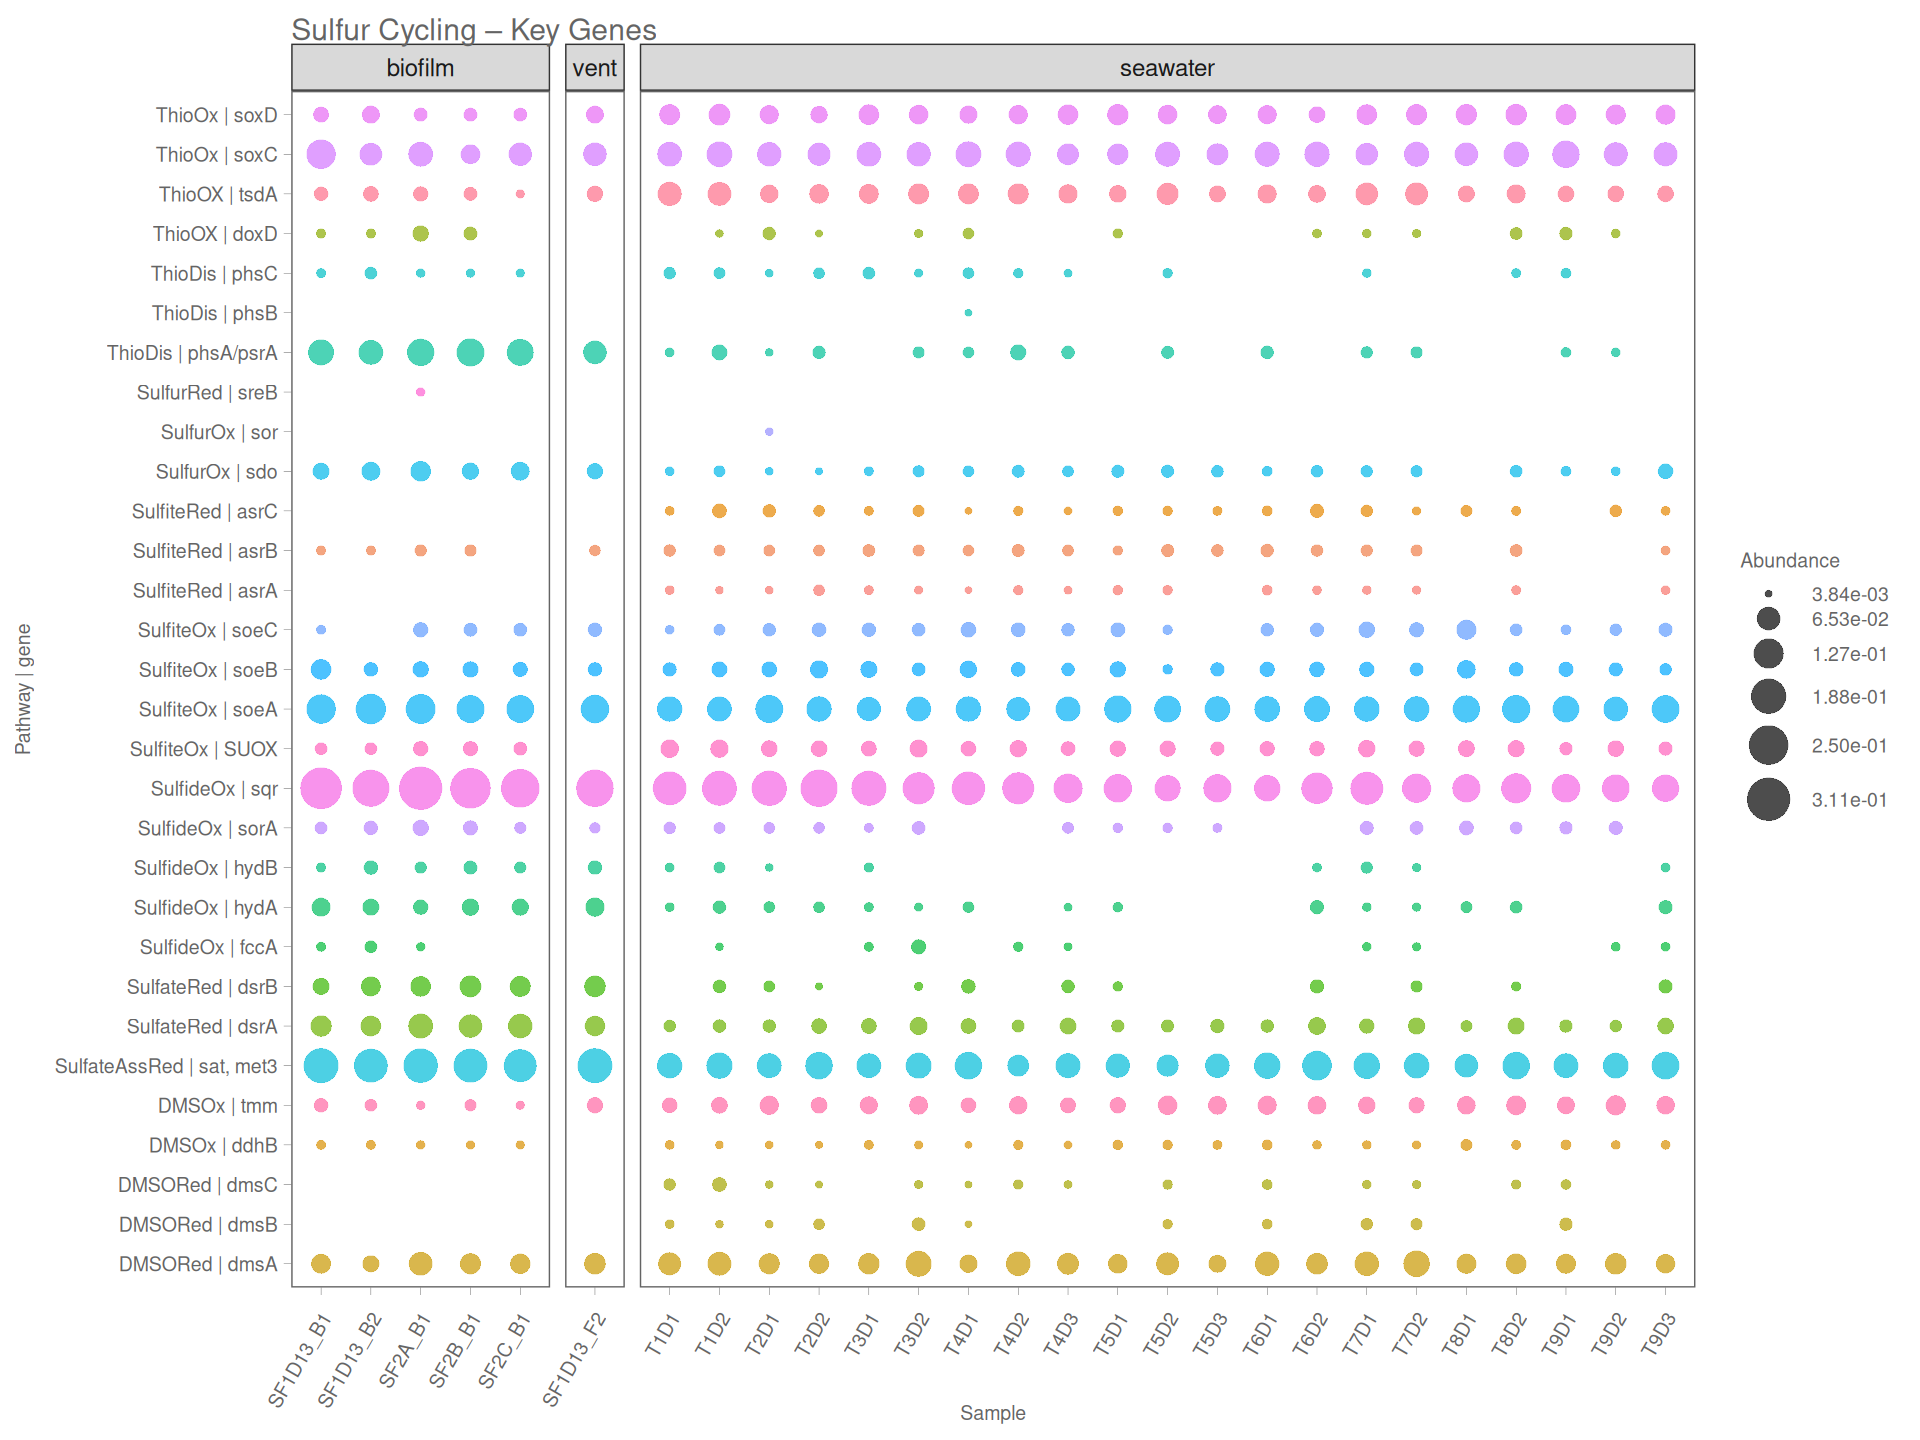

In [58]:
# bubble plot of carbon-fixation key genes
p_sulfur_key <- ggplot(df_key_plot, aes(x = Sample, y = gene_path)) +
  geom_point(aes(size = Abundance, color = gene),
             alpha = 0.7) +
  scale_size_continuous(
    range  = c(2, 12),
    breaks = legend_breaks,
    labels = scales::scientific,
    name   = "Abundance"
  ) +
  facet_grid(. ~ feature_type, scales = "free_x", space = "free_x") +
  theme_bw() +
  theme_glab(base_size = 18) +
  theme(axis.text.x = element_text(angle = 60, vjust = 0.9, hjust = 1)) +
  guides(color = "none") +
  labs(
    title = "Sulfur Cycling – Key Genes",
    x = "Sample",
    y = "Pathway | gene"
  )

p_sulfur_key

#ggsave("./plots/Sulfur_key_bubble.png", p_sulfur_key,width = 16, height = 9, dpi = 300)
#ggsave("./plots/Sulfur_key_bubble.svg", p_sulfur_key,width = 16, height = 9, dpi = 300)